In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# load data to a time series
df = pd.read_csv('HSI.csv').loc[:, ['Date', 'Adj Close']].rename(columns={'Date': 'tradeDate', 'Adj Close': 'curPx'})
df.index = pd.to_datetime(df['tradeDate'], format='%Y/%m/%d')
df.pop('tradeDate')

tradeDate
2019-01-07    2019-01-07
2019-01-08    2019-01-08
2019-01-09    2019-01-09
2019-01-10    2019-01-10
2019-01-11    2019-01-11
2019-01-14    2019-01-14
2019-01-15    2019-01-15
2019-01-16    2019-01-16
2019-01-17    2019-01-17
2019-01-18    2019-01-18
2019-01-21    2019-01-21
2019-01-22    2019-01-22
2019-01-23    2019-01-23
2019-01-24    2019-01-24
2019-01-25    2019-01-25
2019-01-28    2019-01-28
2019-01-29    2019-01-29
2019-01-30    2019-01-30
2019-01-31    2019-01-31
2019-02-01    2019-02-01
2019-02-04    2019-02-04
2019-02-08    2019-02-08
2019-02-11    2019-02-11
2019-02-12    2019-02-12
2019-02-13    2019-02-13
2019-02-14    2019-02-14
2019-02-15    2019-02-15
2019-02-18    2019-02-18
2019-02-19    2019-02-19
2019-02-20    2019-02-20
                 ...    
2019-11-21    2019-11-21
2019-11-22    2019-11-22
2019-11-25    2019-11-25
2019-11-26    2019-11-26
2019-11-27    2019-11-27
2019-11-28    2019-11-28
2019-11-29    2019-11-29
2019-12-02    2019-12-02
2019-12-03    2

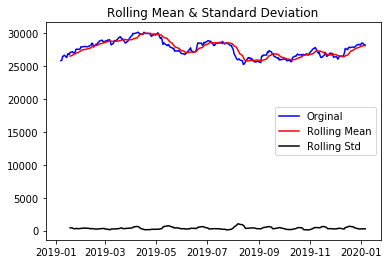

Results of Dickey-Fuller Test:
Test Statistic                  -1.924230
p-value                          0.320750
#Lags Used                       4.000000
Number of Observations Used    241.000000
Critical Value 1%               -3.457779
Critical Value 5%               -2.873609
Critical Value 10%              -2.573202
dtype: float64


In [3]:
# test stationarity of time series
def test_stationarity(ts):
    rolmean = ts.rolling(window=10).mean()
    rolstd = ts.rolling(window=10).std()
    
    # plot rolling statistics:
    orig = plt.plot(ts, color='blue', label='Orginal')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    test = adfuller(ts['curPx'], autolag='AIC')
    output = pd.Series(test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in test[4].items():
        output['Critical Value {}'.format(key)] = value
    
    print(output)
    
    
test_stationarity(df)

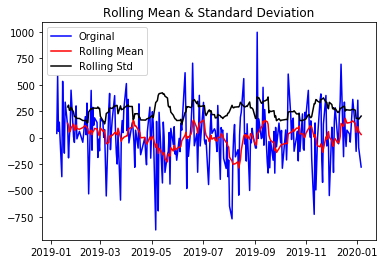

Results of Dickey-Fuller Test:
Test Statistic                -7.891023e+00
p-value                        4.436274e-12
#Lags Used                     3.000000e+00
Number of Observations Used    2.410000e+02
Critical Value 1%             -3.457779e+00
Critical Value 5%             -2.873609e+00
Critical Value 10%            -2.573202e+00
dtype: float64


In [4]:
# You can see from the chart that the rolling mean and standard deviation is periodically fluctuated.
# The Dickey-Fuller Test show the p-value is larger than the shreshold (0.05).
# Therefore, we can conclude that the time series is not stationary.

# Take the first-order differencing  of this time series
df_diff1 = df.diff(1)
df_diff1.dropna(inplace=True)
test_stationarity(df_diff1)

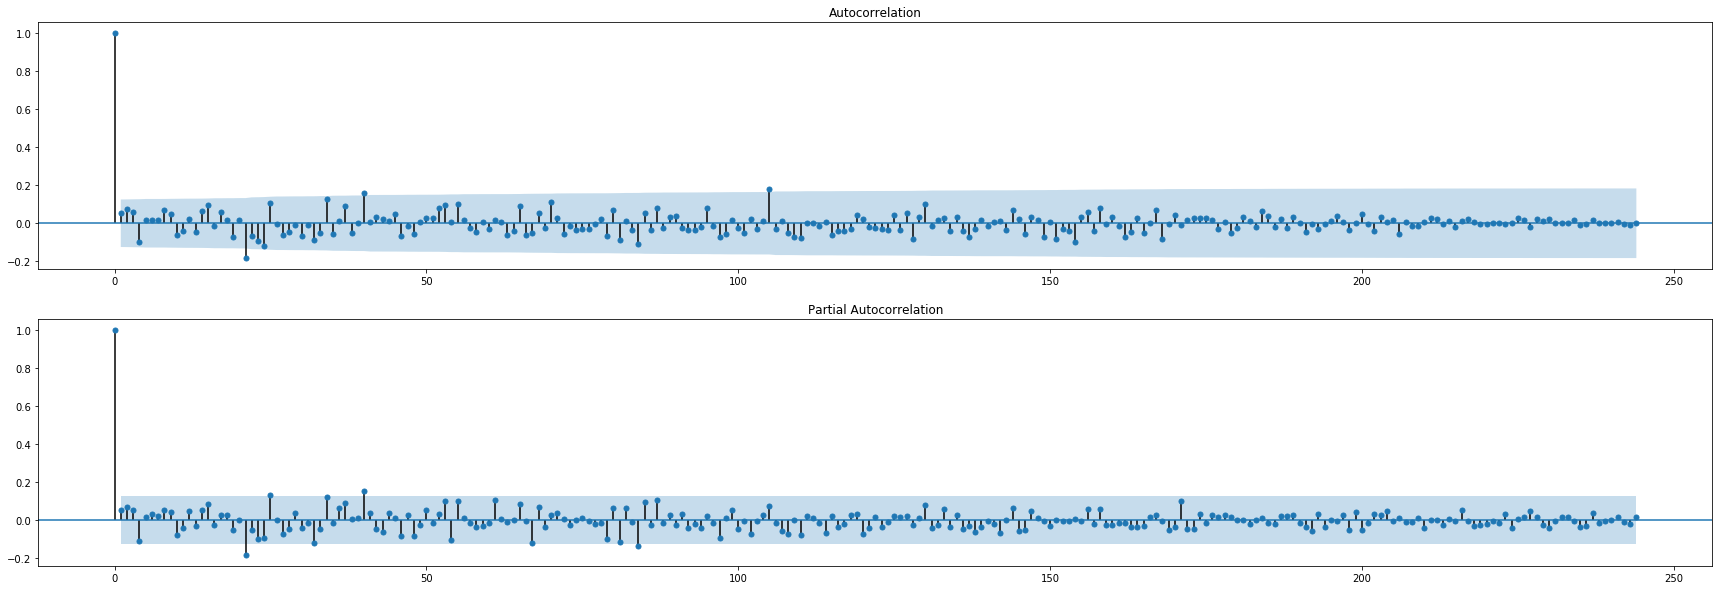

In [5]:
# add method 'ywmle' for yule walker without bias correction
def acf_pacf(ts):
    fig, axes = plt.subplots(2, 1,figsize=(30, 10))
    plot_acf(ts, ax=axes[0])
    plot_pacf(ts, method='ywmle', ax=axes[1])
    plt.show()
      
acf_pacf(df_diff1)

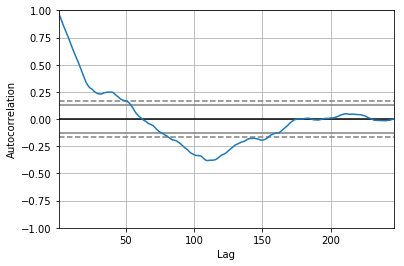

In [6]:
#from the acf, take 0 as the MA order
#from the pacf, take 0 as the AR order
#and 1 as the differencing order

# So the time series for HSI price is a random walk

# Plot the correlogram for the time series.
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df)
plt.show()

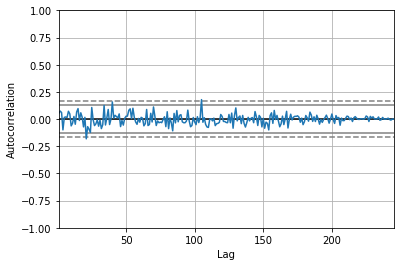

In [8]:
# Plot the correlogram for the first order differencing of the time series.
autocorrelation_plot(df_diff1)
plt.show()

In [ ]:
# We can conclude the time series of HSI price is a random walk. 
# A random walk is unpredictable; it cannot reasonably be predicted.

# Given the way that the random walk is constructed, we can expect that the best prediction we could make would be to use the observation at the previous time step as what will happen in the next time step.